In [161]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [162]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Print the city count to confirm sufficient count

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

607

Perform a weather check on each city using a series of successive API calls.

Include a print log of each city as it'sbeing processed (with the city number and city name).

In [163]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial"
units = "Imperial"
test_city = "cairo"
# Build partial query URL
query_url = f"{url}&q={test_city}&appid={weather_api_key}"
print(query_url)

test_url = url + "&appid=" + weather_api_key  + "&q=" + city
test_response = requests.get(test_url).json()

test_response


http://api.openweathermap.org/data/2.5/weather?&units=Imperial&q=cairo&appid=f05b91b3ef344d0ceff8bce33505e03e


{'coord': {'lon': -115.8, 'lat': 60.82},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 21.2,
  'feels_like': 4.87,
  'temp_min': 21.2,
  'temp_max': 21.2,
  'pressure': 1024,
  'humidity': 79},
 'visibility': 14484,
 'wind': {'speed': 19.46, 'deg': 310},
 'clouds': {'all': 90},
 'dt': 1586545636,
 'sys': {'type': 1,
  'id': 819,
  'country': 'CA',
  'sunrise': 1586522211,
  'sunset': 1586573481},
 'timezone': -21600,
 'id': 5972762,
 'name': 'Hay River',
 'cod': 200}

In [164]:
weather_data = []

print("Beginning Data Retrieval")
print("----------------------------")

# Loop through the list of cities and perform a request for data on each
for counter, city in enumerate(cities):
    test_url = url + "&appid=" + weather_api_key  + "&q=" + city
    print(test_url)

    try:
        response = requests.get(test_url).json()
        print(response)
        print(f'Processing Record {(counter%50 + 1)} of Set {int(counter/50) + 1} | {city}')
        weather_data.append({'City': response['name'],
                            'Temp': response['main']['temp'],
                             'Max Temp': response['main']['temp_max'],
                             'Longitude': response['coord']['lon'],
                             'Latitude': response['coord']['lat'],
                             'Date': response['dt'],
                             'Country': response['sys']['country'],
                             'Cloudiness': response['weather'][0]['main'],
                             'Wind Speed': response['wind']['speed'],
                             'Humidity': response['main']['humidity']
                            })
       
    except:
        print(f"City not found. Skipping..")
        pass

print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
----------------------------
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=belushya guba
{'cod': '404', 'message': 'city not found'}
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping..
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=lewiston
{'coord': {'lon': -70.21, 'lat': 44.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 37.17, 'feels_like': 28.94, 'temp_min': 33.01, 'temp_max': 42.01, 'pressure': 984, 'humidity': 93}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 310}, 'rain': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1586545641, 'sys': {'type': 1, 'id': 4695, 'country': 'US', 'sunrise': 1586513099, 'sunset': 1586560714}, 'timezone': -14400, 'id': 4969398, 'name': 'Lewiston', 'cod': 200}
Processing Record 2 of Set 1 | lewiston
http://api.ope

{'coord': {'lon': 19.74, 'lat': 40.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.77, 'feels_like': 59.83, 'temp_min': 59, 'temp_max': 60.8, 'pressure': 1017, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 200}, 'clouds': {'all': 0}, 'dt': 1586545642, 'sys': {'type': 1, 'id': 6622, 'country': 'AL', 'sunrise': 1586491806, 'sunset': 1586538839}, 'timezone': 7200, 'id': 3185377, 'name': 'Himarë', 'cod': 200}
Processing Record 14 of Set 1 | himare
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 28.15, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 998, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 27.51, 'deg': 230, 'gust': 40.2

{'coord': {'lon': 78.68, 'lat': 27.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.19, 'feels_like': 79.14, 'temp_min': 83.19, 'temp_max': 83.19, 'pressure': 1010, 'humidity': 21, 'sea_level': 1010, 'grnd_level': 992}, 'wind': {'speed': 2.98, 'deg': 23}, 'clouds': {'all': 8}, 'dt': 1586545643, 'sys': {'country': 'IN', 'sunrise': 1586564689, 'sunset': 1586610439}, 'timezone': 19800, 'id': 1269165, 'name': 'Jasrāna', 'cod': 200}
Processing Record 27 of Set 1 | jasrana
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=yantal
{'coord': {'lon': 105.25, 'lat': 56.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.1, 'feels_like': 32.9, 'temp_min': 38.1, 'temp_max': 38.1, 'pressure': 1031, 'humidity': 81, 'sea_level': 1031, 'grnd_level': 990}, 'wind': {'speed': 3.09, 'deg'

{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.86, 'feels_like': 60.01, 'temp_min': 59, 'temp_max': 64.4, 'pressure': 1016, 'humidity': 77}, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1586545644, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1586494754, 'sunset': 1586535747}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
Processing Record 42 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=cabo san lucas
{'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.23, 'feels_like': 75.29, 'temp_min': 66, 'temp_max': 79, 'pressure': 1018, 'humidity': 77}, 'visibility': 14484, 'wind': {'speed': 8.72, 'deg': 300}, 'clouds': {'all'

{'coord': {'lon': 121.66, 'lat': 31.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.6, 'feels_like': 57.45, 'temp_min': 55.99, 'temp_max': 62.01, 'pressure': 1019, 'humidity': 91}, 'wind': {'speed': 3, 'gust': 5.99}, 'clouds': {'all': 100}, 'dt': 1586545644, 'sys': {'type': 3, 'id': 2000071, 'country': 'CN', 'sunrise': 1586554157, 'sunset': 1586600344}, 'timezone': 28800, 'id': 1806840, 'name': 'Huilong', 'cod': 200}
Processing Record 5 of Set 2 | huilong
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=karratha
{'coord': {'lon': 116.85, 'lat': -20.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.3, 'feels_like': 83.44, 'temp_min': 81.3, 'temp_max': 81.3, 'pressure': 1014, 'humidity': 66, 'sea_level': 1014, 'grnd_level': 1010}, 'wind': {'speed': 8.72, 'deg': 202}

{'coord': {'lon': 45, 'lat': 40.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.13, 'feels_like': 32.77, 'temp_min': 39.13, 'temp_max': 39.13, 'pressure': 1012, 'humidity': 51, 'sea_level': 1012, 'grnd_level': 873}, 'wind': {'speed': 2.86, 'deg': 18}, 'clouds': {'all': 98}, 'dt': 1586545645, 'sys': {'country': 'AM', 'sunrise': 1586485710, 'sunset': 1586532813}, 'timezone': 14400, 'id': 616752, 'name': 'Gosh', 'cod': 200}
Processing Record 21 of Set 2 | gosh
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=barrow
{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': -9.4, 'feels_like': -20.7, 'temp_min': -9.4, 'temp_max': -9.4, 'pressure': 1026, 'humidity': 76}, 'visibility': 9656, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all': 75}, 

{'coord': {'lon': -4.72, 'lat': 41.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55.85, 'feels_like': 53.76, 'temp_min': 53.6, 'temp_max': 60.01, 'pressure': 1020, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 10}, 'rain': {'3h': 1.84}, 'clouds': {'all': 66}, 'dt': 1586545646, 'sys': {'type': 1, 'id': 6437, 'country': 'ES', 'sunrise': 1586497574, 'sunset': 1586544810}, 'timezone': 7200, 'id': 3119631, 'name': 'Laguna de Duero', 'cod': 200}
Processing Record 37 of Set 2 | laguna de duero
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=padang
{'coord': {'lon': 100.35, 'lat': -0.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.62, 'feels_like': 85.21, 'temp_min': 78.62, 'temp_max': 78.62, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_lev

{'cod': '404', 'message': 'city not found'}
Processing Record 50 of Set 2 | tarudant
City not found. Skipping..
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=hilo
{'coord': {'lon': -155.09, 'lat': 19.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.53, 'feels_like': 71.1, 'temp_min': 55, 'temp_max': 75, 'pressure': 1016, 'humidity': 73}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1586545441, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1586534742, 'sunset': 1586579806}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
Processing Record 1 of Set 3 | hilo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=san patricio
{'coord': {'lon': -104.7, 'lat': 19.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear 

{'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.4, 'feels_like': 12.06, 'temp_min': 19.4, 'temp_max': 19.4, 'pressure': 1032, 'humidity': 52}, 'visibility': 48279, 'wind': {'speed': 2.24, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 1586545648, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1586523978, 'sunset': 1586577008}, 'timezone': -21600, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
Processing Record 18 of Set 3 | norman wells
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=otane
{'coord': {'lon': 176.63, 'lat': -39.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 46.09, 'feels_like': 42.67, 'temp_min': 46.09, 'temp_max': 46.09, 'pressure': 1015, 'humidity': 85, 'sea_level': 1015, 'grnd_level': 1003}, 'wind': {'sp

{'coord': {'lon': -65.71, 'lat': 66.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 22.64, 'feels_like': 17.29, 'temp_min': 22.64, 'temp_max': 22.64, 'pressure': 1016, 'humidity': 83, 'sea_level': 1016, 'grnd_level': 1016}, 'wind': {'speed': 0.34, 'deg': 211}, 'clouds': {'all': 0}, 'dt': 1586545649, 'sys': {'country': 'CA', 'sunrise': 1586509139, 'sunset': 1586562514}, 'timezone': -14400, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}
Processing Record 34 of Set 3 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=avarua
{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 88.7, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 350}, 'r

{'coord': {'lon': 30.69, 'lat': 62.18}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 29.71, 'feels_like': 23, 'temp_min': 29.71, 'temp_max': 29.71, 'pressure': 1013, 'humidity': 95, 'sea_level': 1013, 'grnd_level': 1002}, 'wind': {'speed': 4.72, 'deg': 286}, 'snow': {'3h': 0.12}, 'clouds': {'all': 83}, 'dt': 1586545650, 'sys': {'country': 'RU', 'sunrise': 1586486896, 'sunset': 1586538494}, 'timezone': 10800, 'id': 470762, 'name': 'Vyartsilya', 'cod': 200}
Processing Record 49 of Set 3 | vyartsilya
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=nanortalik
{'coord': {'lon': -45.24, 'lat': 60.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.39, 'feels_like': 28.02, 'temp_min': 36.39, 'temp_max': 36.39, 'pressure': 1001, 'humidity': 78, 'sea_level': 1001, 'grnd_level': 

{'cod': '404', 'message': 'city not found'}
Processing Record 15 of Set 4 | vaitupu
City not found. Skipping..
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=jurado
{'coord': {'lon': -77.76, 'lat': 7.11}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.1, 'feels_like': 91.87, 'temp_min': 83.1, 'temp_max': 83.1, 'pressure': 1009, 'humidity': 82, 'sea_level': 1009, 'grnd_level': 1008}, 'wind': {'speed': 4.99, 'deg': 244}, 'rain': {'3h': 4.03}, 'clouds': {'all': 81}, 'dt': 1586545651, 'sys': {'country': 'CO', 'sunrise': 1586516668, 'sunset': 1586560768}, 'timezone': -18000, 'id': 3680090, 'name': 'Juradó', 'cod': 200}
Processing Record 16 of Set 4 | jurado
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=north myrtle beach
{'coord': {'lon': -78.68, 'lat': 33.82}, 'weather': [{'id': 800, 'main': 'Cle

{'coord': {'lon': 40.53, 'lat': 51.32}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 48.29, 'feels_like': 40.77, 'temp_min': 48.29, 'temp_max': 48.29, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd_level': 996}, 'wind': {'speed': 10.65, 'deg': 359}, 'rain': {'3h': 1}, 'clouds': {'all': 100}, 'dt': 1586545652, 'sys': {'country': 'RU', 'sunrise': 1586485956, 'sunset': 1586534712}, 'timezone': 10800, 'id': 474473, 'name': 'Verkhnyaya Tishanka', 'cod': 200}
Processing Record 31 of Set 4 | verkhnyaya tishanka
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=comodoro rivadavia
{'coord': {'lon': -67.5, 'lat': -45.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 65.28, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1009, 'humidity': 49}, 'visibil

{'coord': {'lon': 88.4, 'lat': 69.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 13.05, 'temp_min': 32, 'temp_max': 32, 'pressure': 1004, 'humidity': 93}, 'visibility': 9000, 'wind': {'speed': 26.84, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1586545652, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1586557422, 'sunset': 1586613040}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
Processing Record 43 of Set 4 | talnakh
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=oyon
{'coord': {'lon': -76.77, 'lat': -10.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 57.49, 'feels_like': 50.86, 'temp_min': 57.49, 'temp_max': 57.49, 'pressure': 1014, 'humidity': 23, 'sea_level': 1014, 'grnd_level': 673}, 'wind': {'speed': 2.89, 'deg':

{'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 16.23, 'temp_min': 23, 'temp_max': 23, 'pressure': 1015, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 3.33, 'deg': 313}, 'clouds': {'all': 49}, 'dt': 1586545653, 'sys': {'type': 1, 'id': 8887, 'country': 'RU', 'sunrise': 1586543740, 'sunset': 1586593009}, 'timezone': 43200, 'id': 2122104, 'name': 'Petropavlovsk-Kamchatskiy', 'cod': 200}
Processing Record 5 of Set 5 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=oriximina
{'coord': {'lon': -55.87, 'lat': -1.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.66, 'feels_like': 98.08, 'temp_min': 90.66, 'temp_max': 90.66, 'pressure': 1008, 'humidity': 54, 'sea_level': 1008, '

{'coord': {'lon': 108.11, 'lat': 57.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 34.23, 'feels_like': 27.99, 'temp_min': 34.23, 'temp_max': 34.23, 'pressure': 1033, 'humidity': 84, 'sea_level': 1033, 'grnd_level': 1001}, 'wind': {'speed': 4.21, 'deg': 34}, 'clouds': {'all': 84}, 'dt': 1586545654, 'sys': {'country': 'RU', 'sunrise': 1586555268, 'sunset': 1586605736}, 'timezone': 28800, 'id': 2022083, 'name': 'Kirensk', 'cod': 200}
Processing Record 23 of Set 5 | kirensk
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=carnarvon
{'coord': {'lon': 113.63, 'lat': -24.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 81.37, 'temp_min': 77, 'temp_max': 77, 'pressure': 1015, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 190}, 'c

{'coord': {'lon': -47.48, 'lat': -2.97}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.48, 'feels_like': 94.78, 'temp_min': 85.48, 'temp_max': 85.48, 'pressure': 1009, 'humidity': 75, 'sea_level': 1009, 'grnd_level': 996}, 'wind': {'speed': 3.58, 'deg': 58}, 'rain': {'3h': 3.18}, 'clouds': {'all': 85}, 'dt': 1586545655, 'sys': {'country': 'BR', 'sunrise': 1586509753, 'sunset': 1586553152}, 'timezone': -10800, 'id': 3393106, 'name': 'Paragominas', 'cod': 200}
Processing Record 36 of Set 5 | paragominas
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=rovenki
{'coord': {'lon': 39.38, 'lat': 48.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.33, 'feels_like': 40.35, 'temp_min': 49.33, 'temp_max': 49.33, 'pressure': 1010, 'humidity': 49, 'sea_level': 1010, 'grnd_lev

{'cod': '404', 'message': 'city not found'}
Processing Record 2 of Set 6 | saint-pascal
City not found. Skipping..
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=batagay-alyta
{'coord': {'lon': 130.41, 'lat': 67.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 19.02, 'feels_like': 9.48, 'temp_min': 19.02, 'temp_max': 19.02, 'pressure': 1014, 'humidity': 85, 'sea_level': 1014, 'grnd_level': 951}, 'wind': {'speed': 7.34, 'deg': 240}, 'clouds': {'all': 46}, 'dt': 1586545656, 'sys': {'country': 'RU', 'sunrise': 1586547914, 'sunset': 1586602388}, 'timezone': 32400, 'id': 2027042, 'name': 'Batagay-Alyta', 'cod': 200}
Processing Record 3 of Set 6 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=husavik
{'coord': {'lon': -17.34, 'lat': 66.04}, 'weather': [{'id': 803, 'main': 'Clouds'

{'coord': {'lon': -60.17, 'lat': -35.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.46, 'feels_like': 66.25, 'temp_min': 72.46, 'temp_max': 72.46, 'pressure': 1020, 'humidity': 39, 'sea_level': 1020, 'grnd_level': 1014}, 'wind': {'speed': 9.4, 'deg': 36}, 'clouds': {'all': 0}, 'dt': 1586545657, 'sys': {'country': 'AR', 'sunrise': 1586514058, 'sunset': 1586554937}, 'timezone': -10800, 'id': 3833112, 'name': 'Veinticinco de Mayo', 'cod': 200}
Processing Record 18 of Set 6 | veinticinco de mayo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=svetlogorsk
{'coord': {'lon': 29.73, 'lat': 52.63}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.42, 'feels_like': 34.34, 'temp_min': 42.42, 'temp_max': 42.42, 'pressure': 1020, 'humidity': 60, 'sea_level': 1020, 'grnd_level': 10

{'coord': {'lon': -98.03, 'lat': 30.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.67, 'feels_like': 64.26, 'temp_min': 66.2, 'temp_max': 73.4, 'pressure': 1017, 'humidity': 56}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 40, 'gust': 20.8}, 'clouds': {'all': 90}, 'dt': 1586545657, 'sys': {'type': 1, 'id': 3355, 'country': 'US', 'sunrise': 1586520598, 'sunset': 1586566566}, 'timezone': -18000, 'id': 4696788, 'name': 'Hays', 'cod': 200}
Processing Record 33 of Set 6 | hays
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=belle glade
{'coord': {'lon': -80.67, 'lat': 26.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 90.37, 'feels_like': 88.63, 'temp_min': 87.01, 'temp_max': 93.99, 'pressure': 1010, 'humidity': 46}, 'visibility': 16093, 'wind': {'spe

{'coord': {'lon': 11.5, 'lat': 55.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.95, 'feels_like': 35.87, 'temp_min': 39, 'temp_max': 46.4, 'pressure': 1025, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 330}, 'clouds': {'all': 65}, 'dt': 1586545658, 'sys': {'type': 1, 'id': 1588, 'country': 'DK', 'sunrise': 1586492428, 'sunset': 1586542172}, 'timezone': 7200, 'id': 2624521, 'name': 'Asnæs', 'cod': 200}
Processing Record 48 of Set 6 | asnaes
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=maryborough
{'coord': {'lon': 152.7, 'lat': -25.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.01, 'feels_like': 72.61, 'temp_min': 69.01, 'temp_max': 69.01, 'pressure': 1011, 'humidity': 91}, 'wind': {'speed': 4, 'deg': 229, 'gust': 5.99}, 'clouds'

{'coord': {'lon': 55.62, 'lat': -21.37}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 72.12, 'feels_like': 67.64, 'temp_min': 62.01, 'temp_max': 78.8, 'pressure': 1018, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1586545660, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1586485659, 'sunset': 1586527767}, 'timezone': 14400, 'id': 6690296, 'name': 'Saint-Joseph', 'cod': 200}
Processing Record 11 of Set 7 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=pyay
{'coord': {'lon': 95.22, 'lat': 18.82}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.53, 'feels_like': 79.65, 'temp_min': 76.53, 'temp_max': 76.53, 'pressure': 1013, 'humidity': 64, 'sea_level': 1013, 'grnd_level': 1008}, 'wind'

{'coord': {'lon': -3, 'lat': 20}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 96.51, 'feels_like': 88.11, 'temp_min': 96.51, 'temp_max': 96.51, 'pressure': 1005, 'humidity': 7, 'sea_level': 1005, 'grnd_level': 974}, 'wind': {'speed': 6.46, 'deg': 249}, 'clouds': {'all': 38}, 'dt': 1586545661, 'sys': {'country': 'ML', 'sunrise': 1586498250, 'sunset': 1586543308}, 'timezone': 0, 'id': 2449066, 'name': 'Tombouctou', 'cod': 200}
Processing Record 23 of Set 7 | tombouctou
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=san quintin
{'coord': {'lon': -115.95, 'lat': 30.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 61.72, 'feels_like': 56.35, 'temp_min': 61.72, 'temp_max': 61.72, 'pressure': 1017, 'humidity': 57, 'sea_level': 1017, 'grnd_level': 1016}, 'wind': {'sp

{'coord': {'lon': -17.92, 'lat': 28.66}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 72.09, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1021, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1586545661, 'sys': {'type': 1, 'id': 2377, 'country': 'ES', 'sunrise': 1586501453, 'sunset': 1586547265}, 'timezone': 3600, 'id': 2514651, 'name': 'Los Llanos de Aridane', 'cod': 200}
Processing Record 39 of Set 7 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=ryotsu
{'coord': {'lon': 138.43, 'lat': 38.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 33.44, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1020, 'humidity': 86}, 'visibility': 10000, 'wind': {'sp

{'coord': {'lon': -66.38, 'lat': 50.2}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 25.29, 'temp_min': 41, 'temp_max': 41, 'pressure': 987, 'humidity': 35}, 'visibility': 48279, 'wind': {'speed': 18.34, 'deg': 90, 'gust': 29.97}, 'clouds': {'all': 90}, 'dt': 1586545614, 'sys': {'type': 1, 'id': 1013, 'country': 'CA', 'sunrise': 1586511681, 'sunset': 1586560294}, 'timezone': -14400, 'id': 6144312, 'name': 'Sept-Îles', 'cod': 200}
Processing Record 3 of Set 8 | sept-iles
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=seoul
{'coord': {'lon': 126.98, 'lat': 37.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 40.87, 'feels_like': 35.4, 'temp_min': 33.8, 'temp_max': 46.4, 'pressure': 1023, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 3.33, 'deg': 207},

{'coord': {'lon': 108.27, 'lat': -2.88}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.76, 'feels_like': 88.38, 'temp_min': 80.76, 'temp_max': 80.76, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 1010}, 'wind': {'speed': 4.23, 'deg': 285}, 'rain': {'3h': 0.23}, 'clouds': {'all': 100}, 'dt': 1586545663, 'sys': {'country': 'ID', 'sunrise': 1586558764, 'sunset': 1586602163}, 'timezone': 25200, 'id': 1636426, 'name': 'Manggar', 'cod': 200}
Processing Record 16 of Set 8 | manggar
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=bethel
{'coord': {'lon': -73.41, 'lat': 41.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 45.97, 'feels_like': 31.44, 'temp_min': 42.01, 'temp_max': 50, 'pressure': 994, 'humidity': 48}, 'visibility': 16093, 'wind': {'speed': 1

{'coord': {'lon': -81.78, 'lat': 24.56}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.51, 'feels_like': 90.16, 'temp_min': 82.99, 'temp_max': 86, 'pressure': 1013, 'humidity': 70}, 'visibility': 14484, 'wind': {'speed': 6.93, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1586545663, 'sys': {'type': 1, 'id': 4033, 'country': 'US', 'sunrise': 1586516954, 'sunset': 1586562411}, 'timezone': -14400, 'id': 4160812, 'name': 'Key West', 'cod': 200}
Processing Record 33 of Set 8 | key west
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=ahuimanu
{'coord': {'lon': -157.84, 'lat': 21.44}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.96, 'feels_like': 76.24, 'temp_min': 71.6, 'temp_max': 77, 'pressure': 1015, 'humidity': 69}, 'visibility': 16093, 'wind': {'speed': 3.91, '

{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 59.13, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1013, 'humidity': 72}, 'wind': {'speed': 8.05, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1586545378, 'sys': {'type': 1, 'id': 2260, 'country': 'NA', 'sunrise': 1586495579, 'sunset': 1586537264}, 'timezone': 7200, 'id': 3355672, 'name': 'Lüderitz', 'cod': 200}
Processing Record 47 of Set 8 | luderitz
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=arrecife
{'coord': {'lon': -13.55, 'lat': 28.96}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.05, 'feels_like': 63.43, 'temp_min': 71.6, 'temp_max': 73.4, 'pressure': 1018, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 10}, 'clouds': {'all': 20}, 'd

{'coord': {'lon': 22.75, 'lat': 48.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 32.49, 'temp_min': 41, 'temp_max': 41, 'pressure': 1022, 'humidity': 42}, 'wind': {'speed': 6.2, 'deg': 27}, 'clouds': {'all': 17}, 'dt': 1586545665, 'sys': {'type': 3, 'id': 2019485, 'country': 'UA', 'sunrise': 1586490457, 'sunset': 1586538743}, 'timezone': 10800, 'id': 696478, 'name': 'Poroshkovo', 'cod': 200}
Processing Record 13 of Set 9 | poroshkovo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=kalmunai
{'coord': {'lon': 81.82, 'lat': 7.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.82, 'feels_like': 86.34, 'temp_min': 81.82, 'temp_max': 81.82, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 1012}, 'wind': {'speed': 8.46, 'deg': 74}, 'clo

{'coord': {'lon': 78.36, 'lat': 42.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.25, 'feels_like': 33.94, 'temp_min': 41.25, 'temp_max': 41.25, 'pressure': 1024, 'humidity': 32, 'sea_level': 1024, 'grnd_level': 842}, 'wind': {'speed': 3.15, 'deg': 162}, 'clouds': {'all': 91}, 'dt': 1586545666, 'sys': {'country': 'KG', 'sunrise': 1586563880, 'sunset': 1586611401}, 'timezone': 21600, 'id': 1527121, 'name': 'Tyup', 'cod': 200}
Processing Record 27 of Set 9 | tyup
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=keetmanshoop
{'coord': {'lon': 18.13, 'lat': -26.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 76.62, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 21}, 'wind': {'speed': 5.82, 'deg': 30}, 'clouds': {'all': 55}, 

{'coord': {'lon': 34.53, 'lat': 10.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.39, 'feels_like': 70.54, 'temp_min': 72.39, 'temp_max': 72.39, 'pressure': 1008, 'humidity': 39, 'sea_level': 1008, 'grnd_level': 857}, 'wind': {'speed': 1.63, 'deg': 157}, 'clouds': {'all': 91}, 'dt': 1586545667, 'sys': {'country': 'ET', 'sunrise': 1586489622, 'sunset': 1586533925}, 'timezone': 10800, 'id': 343292, 'name': 'Āsosa', 'cod': 200}
Processing Record 44 of Set 9 | asosa
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=concordia
{'coord': {'lon': -58.02, 'lat': -31.39}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.18, 'feels_like': 67.15, 'temp_min': 73, 'temp_max': 73.4, 'pressure': 1019, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 120},

{'coord': {'lon': -103.15, 'lat': 44.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.3, 'feels_like': 52.16, 'temp_min': 55, 'temp_max': 63, 'pressure': 1009, 'humidity': 23}, 'visibility': 16093, 'wind': {'speed': 5.97, 'deg': 51}, 'clouds': {'all': 1}, 'dt': 1586545667, 'sys': {'type': 1, 'id': 5623, 'country': 'US', 'sunrise': 1586520998, 'sunset': 1586568624}, 'timezone': -21600, 'id': 5768244, 'name': 'Rapid Valley', 'cod': 200}
Processing Record 6 of Set 10 | rapid valley
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=maghama
{'cod': '404', 'message': 'city not found'}
Processing Record 7 of Set 10 | maghama
City not found. Skipping..
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=melfi
{'coord': {'lon': 15.65, 'lat': 41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear s

{'coord': {'lon': -74.78, 'lat': -0.19}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.66, 'feels_like': 89.2, 'temp_min': 81.66, 'temp_max': 81.66, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 990}, 'wind': {'speed': 3.69, 'deg': 96}, 'rain': {'3h': 4.2}, 'clouds': {'all': 95}, 'dt': 1586545668, 'sys': {'country': 'CO', 'sunrise': 1586516208, 'sunset': 1586559798}, 'timezone': -18000, 'id': 3671437, 'name': 'Caucayá', 'cod': 200}
Processing Record 21 of Set 10 | puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=dogondoutchi
{'coord': {'lon': 4.03, 'lat': 13.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 92.97, 'feels_like': 83.88, 'temp_min': 92.97, 'temp_max': 92.97, 'pressure': 1009, 'humidity': 22, 'sea_level': 1009, 'grnd

{'coord': {'lon': 52.12, 'lat': 44.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.67, 'feels_like': 39.81, 'temp_min': 48.67, 'temp_max': 48.67, 'pressure': 1015, 'humidity': 44, 'sea_level': 1015, 'grnd_level': 984}, 'wind': {'speed': 8.37, 'deg': 72}, 'clouds': {'all': 0}, 'dt': 1586545669, 'sys': {'country': 'KZ', 'sunrise': 1586570065, 'sunset': 1586617808}, 'timezone': 18000, 'id': 608324, 'name': 'Shetpe', 'cod': 200}
Processing Record 37 of Set 10 | shetpe
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=xining
{'coord': {'lon': 101.77, 'lat': 36.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.67, 'feels_like': 28.33, 'temp_min': 35.67, 'temp_max': 35.67, 'pressure': 1028, 'humidity': 27, 'sea_level': 1028, 'grnd_level': 783}, 'wind': {'speed': 2.26, 'd

{'coord': {'lon': 29.96, 'lat': 31.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 54.39, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1015, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1586545671, 'sys': {'type': 1, 'id': 2511, 'country': 'EG', 'sunrise': 1586489848, 'sunset': 1586535892}, 'timezone': 7200, 'id': 361058, 'name': 'Alexandria', 'cod': 200}
Processing Record 3 of Set 11 | alexandria
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=barhi
{'coord': {'lon': 80.8, 'lat': 23.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.36, 'feels_like': 74.84, 'temp_min': 81.36, 'temp_max': 81.36, 'pressure': 1014, 'humidity': 16, 'sea_level': 1014, 'grnd_level': 972}, 'wind': {'speed': 

{'coord': {'lon': -36.18, 'lat': -10.13}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 85.6, 'feels_like': 87.51, 'temp_min': 85.6, 'temp_max': 85.6, 'pressure': 1010, 'humidity': 65, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 12.44, 'deg': 106}, 'clouds': {'all': 35}, 'dt': 1586545671, 'sys': {'country': 'BR', 'sunrise': 1586507288, 'sunset': 1586550193}, 'timezone': -10800, 'id': 3465329, 'name': 'Coruripe', 'cod': 200}
Processing Record 17 of Set 11 | coruripe
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=wad rawah
{'coord': {'lon': 33.14, 'lat': 15.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 90.3, 'feels_like': 77.68, 'temp_min': 90.3, 'temp_max': 90.3, 'pressure': 1007, 'humidity': 10, 'sea_level': 1007, 'grnd_level': 963}, 'wind': {'speed': 

{'coord': {'lon': 10.66, 'lat': -3.43}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 81.18, 'feels_like': 87.78, 'temp_min': 81.18, 'temp_max': 81.18, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 1009}, 'wind': {'speed': 7.94, 'deg': 174}, 'rain': {'3h': 0.78}, 'clouds': {'all': 100}, 'dt': 1586545582, 'sys': {'country': 'GA', 'sunrise': 1586495817, 'sunset': 1586539186}, 'timezone': 3600, 'id': 2399001, 'name': 'Mayumba', 'cod': 200}
Processing Record 33 of Set 11 | mayumba
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=havre-saint-pierre
{'coord': {'lon': -63.6, 'lat': 50.23}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 13.75, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 986, 'humidity': 92}, 'visibility': 1609, 'wind': {'speed':

{'coord': {'lon': 14.58, 'lat': 1.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.72, 'feels_like': 84.24, 'temp_min': 79.72, 'temp_max': 79.72, 'pressure': 1009, 'humidity': 62, 'sea_level': 1009, 'grnd_level': 962}, 'wind': {'speed': 1.77, 'deg': 199}, 'clouds': {'all': 81}, 'dt': 1586545673, 'sys': {'country': 'CG', 'sunrise': 1586494703, 'sunset': 1586538418}, 'timezone': 3600, 'id': 2255304, 'name': 'Sémbé', 'cod': 200}
Processing Record 49 of Set 11 | sembe
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=wahran
{'cod': '404', 'message': 'city not found'}
Processing Record 50 of Set 11 | wahran
City not found. Skipping..
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=taraz
{'coord': {'lon': 71.37, 'lat': 42.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds',

{'coord': {'lon': 92.07, 'lat': 49.98}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.77, 'feels_like': 20.89, 'temp_min': 27.77, 'temp_max': 27.77, 'pressure': 1028, 'humidity': 69, 'sea_level': 1028, 'grnd_level': 916}, 'wind': {'speed': 3.18, 'deg': 296}, 'clouds': {'all': 78}, 'dt': 1586545674, 'sys': {'country': 'MN', 'sunrise': 1586560003, 'sunset': 1586608698}, 'timezone': 25200, 'id': 1515029, 'name': 'Ulaangom', 'cod': 200}
Processing Record 12 of Set 12 | ulaangom
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=yei
{'coord': {'lon': 30.68, 'lat': 4.09}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.12, 'feels_like': 79.23, 'temp_min': 78.12, 'temp_max': 78.12, 'pressure': 1008, 'humidity': 46, 'sea_level': 1008, 'grnd_level': 917}, 'wind': {'speed': 1.

{'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 79.21, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1013, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 159}, 'clouds': {'all': 90}, 'dt': 1586545675, 'sys': {'type': 1, 'id': 8337, 'country': 'BR', 'sunrise': 1586508875, 'sunset': 1586550944}, 'timezone': -10800, 'id': 3448903, 'name': 'São João da Barra', 'cod': 200}
Processing Record 29 of Set 12 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=ust-nera
{'coord': {'lon': 143.2, 'lat': 64.57}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.06, 'feels_like': 7.59, 'temp_min': 17.06, 'temp_max': 17.06, 'pressure': 1016, 'humidity': 86, 'sea_level': 1016, 'grnd_level

{'coord': {'lon': 142.37, 'lat': 42.33}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 34.61, 'feels_like': 25.56, 'temp_min': 34.61, 'temp_max': 34.61, 'pressure': 1016, 'humidity': 84, 'sea_level': 1016, 'grnd_level': 1013}, 'wind': {'speed': 9.31, 'deg': 335}, 'clouds': {'all': 31}, 'dt': 1586545676, 'sys': {'country': 'JP', 'sunrise': 1586548564, 'sunset': 1586595998}, 'timezone': 32400, 'id': 2128025, 'name': 'Shizunai-furukawachō', 'cod': 200}
Processing Record 43 of Set 12 | shizunai
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=f05b91b3ef344d0ceff8bce33505e03e&q=tiarei
{'coord': {'lon': -149.33, 'lat': -17.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 89.58, 'temp_min': 86, 'temp_max': 86, 'pressure': 1015, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 10.29,

In [167]:
weather_df = pd.DataFrame(weather_data)


In [168]:
weather_df.head()

,City,Temp,Max Temp,Longitude,Latitude,Date,Country,Cloudiness,Wind Speed,Humidity
0,Lewiston,37.17,42.01,-70.21,44.10,1586545641,US,Rain,9.17,93
1,Constitución,63.34,63.34,-72.42,-35.33,1586545641,CL,Clouds,6.49,58
2,Gouré,91.00,91.00,10.27,13.98,1586545641,NE,Clouds,3.00,13
3,Saint Paul Harbor,35.60,35.60,-152.41,57.79,1586545641,US,Clear,2.28,69
4,Waitati,52.05,53.01,170.57,-45.75,1586545641,NZ,Clear,5.01,91


In [169]:
weather_df.isnull().values.any()

False

In [170]:
weather_df.count()

City          549
Temp          549
Max Temp      549
Longitude     549
Latitude      549
Date          549
Country       549
Cloudiness    549
Wind Speed    549
Humidity      549
dtype: int64

In [171]:
weather_df.to_csv('api_homework')

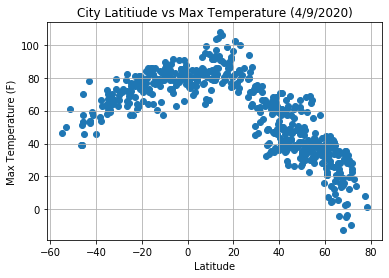

In [172]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitiude vs Max Temperature (4/9/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('resources/images/lat_max_temp.png')
plt.show()

Above 20 degrees latitude there's a correlation with the max temperature steadily falls.  Btw -40 and 20 degrees latitude, the max temperature is consistent.  Cities btw 0 and 20 degrees have highest max temperature

In [173]:
weather_df[weather_df['Latitude'] < 20]

,City,Temp,Max Temp,Longitude,Latitude,Date,Country,Cloudiness,Wind Speed,Humidity
1,Constitución,63.34,63.34,-72.42,-35.33,1586545641,CL,Clouds,6.49,58
2,Gouré,91.00,91.00,10.27,13.98,1586545641,NE,Clouds,3.00,13
4,Waitati,52.05,53.01,170.57,-45.75,1586545641,NZ,Clear,5.01,91
7,Beloha,72.21,72.21,45.05,-25.17,1586545641,MG,Clouds,19.22,76
8,Cape Town,63.12,64.40,18.42,-33.93,1586545617,ZA,Clear,4.70,82
...,...,...,...,...,...,...,...,...,...,...
531,Río Gallegos,60.80,60.80,-69.22,-51.62,1586545676,AR,Clouds,18.34,29
532,Daoukro,76.64,76.64,-3.96,7.06,1586545676,CI,Rain,9.86,86
535,Tiarei,86.00,86.00,-149.33,-17.53,1586545676,PF,Clouds,10.29,66
545,Caravelas,79.68,79.68,-39.25,-17.71,1586545676,BR,Rain,14.67,80


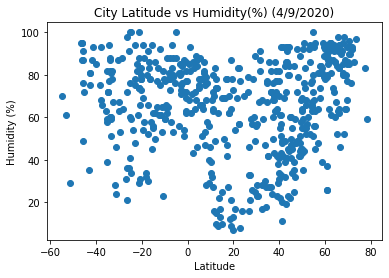

In [174]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity(%) (4/9/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('resources/images/lat_humidity.png')
plt.show()

The ranges in % of humidity across all latitudes has diversity.  No clear correlation or points of distinction.

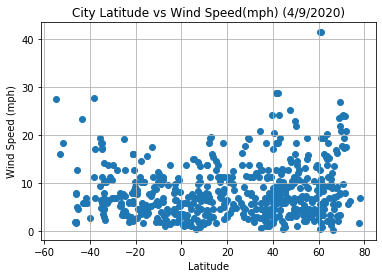

In [175]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed(mph) (4/9/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('resources/images/lat_wind_speed.png')
plt.show()

There's a greater amount of cities in the dataframe that have a latitude degree of 0 or greater.  There's no correlation that the latitude affects wind speed

In [176]:
#factorizing the 'Cloudiness' column

facts = np.unique(np.unique(weather_df[['Cloudiness']]), return_index=True)

mapping = dict(zip(*facts))

weather_df = weather_df.join(weather_df[['Cloudiness']].apply(lambda x: x.map(mapping)).add_suffix('_ID'))

In [177]:
mapping

{'Clear': 0,
 'Clouds': 1,
 'Drizzle': 2,
 'Haze': 3,
 'Rain': 4,
 'Smoke': 5,
 'Snow': 6}

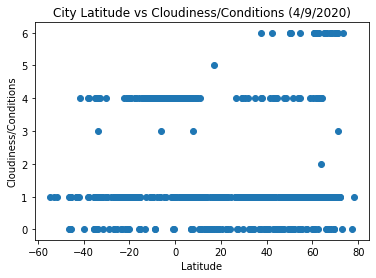

In [178]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness_ID']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness/Conditions (4/9/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness/Conditions')
plt.savefig('resources/images/lat_clouds_conditions.png')
plt.show()

Snow is only found in latitudes greater than 40, most likely cities in winter season.  Clouds and Rain are consistent across all latitudes.  Mist is only found in latitudes greater than 20.  

In [179]:
northern_hem = weather_df[weather_df['Latitude'] >= 0]
southern_hem = weather_df[weather_df['Latitude'] < 0]


Northern Hemisphere: City Latitude vs Max Temperature

In [183]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      48.793987
2      80.804758
3      34.244603
5      43.597019
6      43.256932
         ...    
542    48.368877
543    20.874899
544    47.943767
547    49.165958
548    31.024396
Name: Latitude, Length: 375, dtype: float64


In [184]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.06x +95.66


The r-squared is: 0.7689680389611799


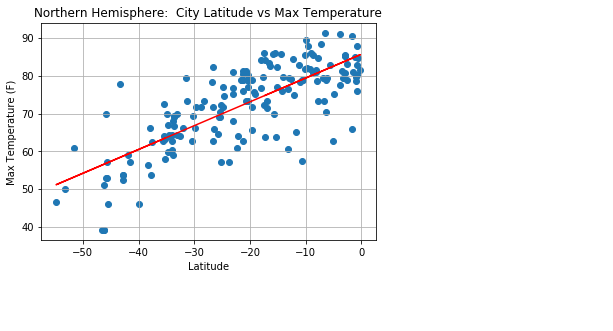

In [189]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere:  City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.grid()
plt.savefig('resources/images/nhem_lat_max_temp.png')
plt.show()

Southern Hemisphere: City Latitude vs Max Temperature

In [186]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      63.408073
4      56.823759
7      69.828096
8      64.292722
11     52.147758
         ...    
530    73.366691
531    53.114553
535    74.655750
545    74.542010
546    74.801086
Name: Latitude, Length: 174, dtype: float64


In [187]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.63x +85.73


The r-squared is: 0.7689680389611799


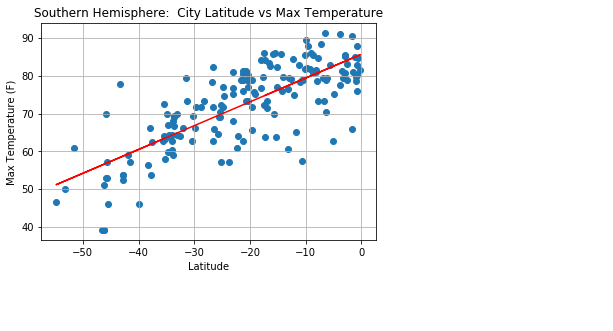

In [190]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere:  City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.grid()
plt.savefig('resources/images/shem_lat_max_temp.png')
plt.show()

In [ ]:
city_data = []
record_count = 1
set_count = 1

# Group cities in sets of 50 for logging purposes
    
        
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = query_url + city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    record_count += 1
    try:
        response = requests.get(city_url).json()
#         print(response)
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lng']
        
        city_data.append({"city": city,
                          'Lat': city_lat,
                          'Lng': city_lng})
    except:
        print(f"City not found. Skipping..")
        pass
    